# Topic: Building a Wine Quality Classifier
### Assignment: DTSA 5509 Supervised Learning Final Project

**Objective:**
The objective of this project is to determine which machine learning technique best predicts wine quality (on a scale of 0 to 10) using 13 chemical properties of the wine. This is a supervised learning classification task, and we will apply SVM and Random Forest algorithms to evaluate their performance and identify the most effective approach.



## Data: Wine Quality Dataset

### From Kaggle
Description:
This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

Acknowledgements:
This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "dataset/WineQT.csv"
wine_data = pd.read_csv(data_path)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# get the size
print(f"Dataset shape:\n{wine_data.shape[0]} rows data and {wine_data.shape[1]} features")

Dataset shape:
1143 rows data and 13 features


In [4]:
# get the type
print("Data types of each column:")
print(wine_data.dtypes)

Data types of each column:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


### About the data type:
All features in the dataset are numeric, with no categorical features. 
The quality column, although numeric, is treated as the target label for classification, 
as it represents discrete wine quality ratings on a scale from 0 to 10.

## How to build the best Classifier 

To build the best classifier, we will start by selecting two machine learning methods: Support Vector Machine (SVM) and Random Forest. We will then experiment with different hyperparameters for each model to identify the optimal configuration and determine which method performs best for predicting wine quality.

### data cleaning:

In [5]:
# Check for missing data
print("Checking for missing values:")
print(wine_data.isnull().sum())

Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
# check for duplicate
wine_data = wine_data.drop_duplicates()

# Check for duplicates
print(f"Number of duplicates removed: {wine_data.duplicated().sum()}")

Number of duplicates removed: 0


In [7]:
# Drop Id
if 'Id' in wine_data.columns:
    wine_data = wine_data.drop(columns=['Id'])

### The Insight from Data

In [8]:
print(wine_data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

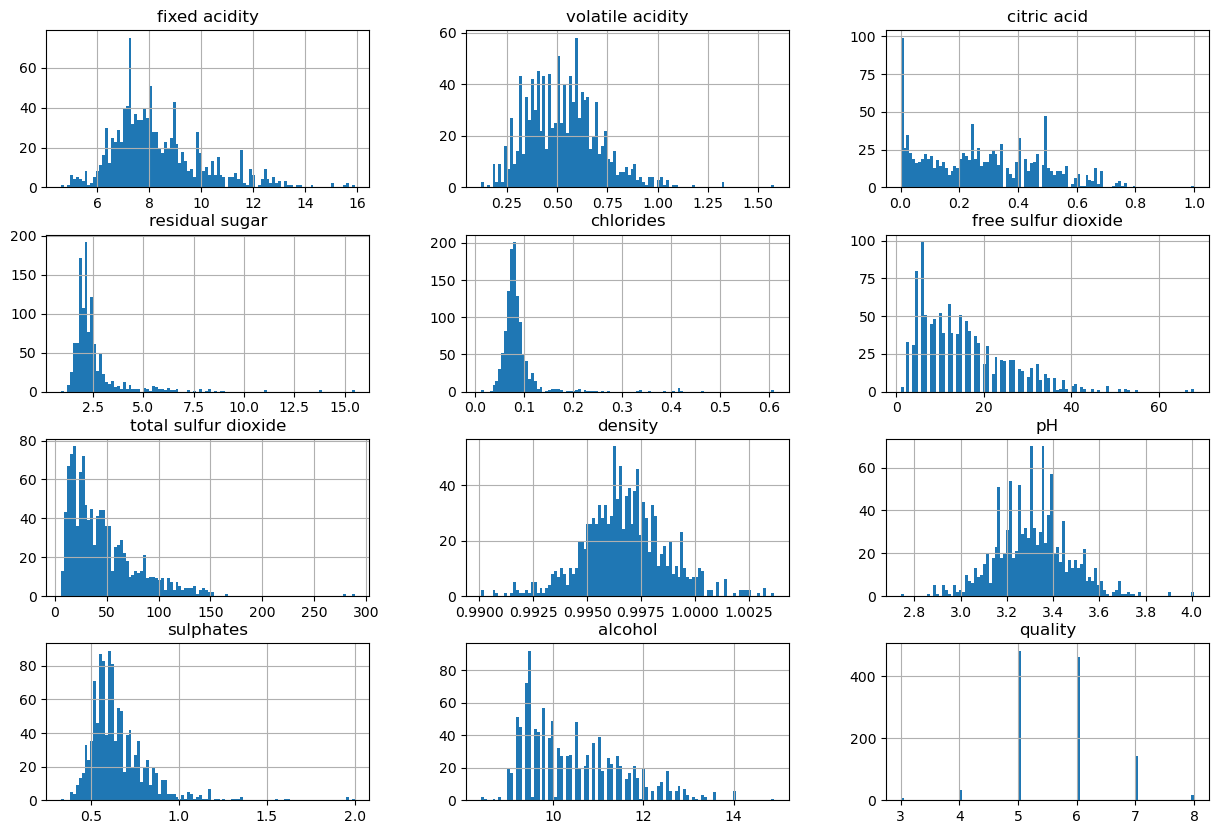

In [9]:
# Histograms
wine_data.hist(bins=100, figsize=(15, 10))
plt.show()

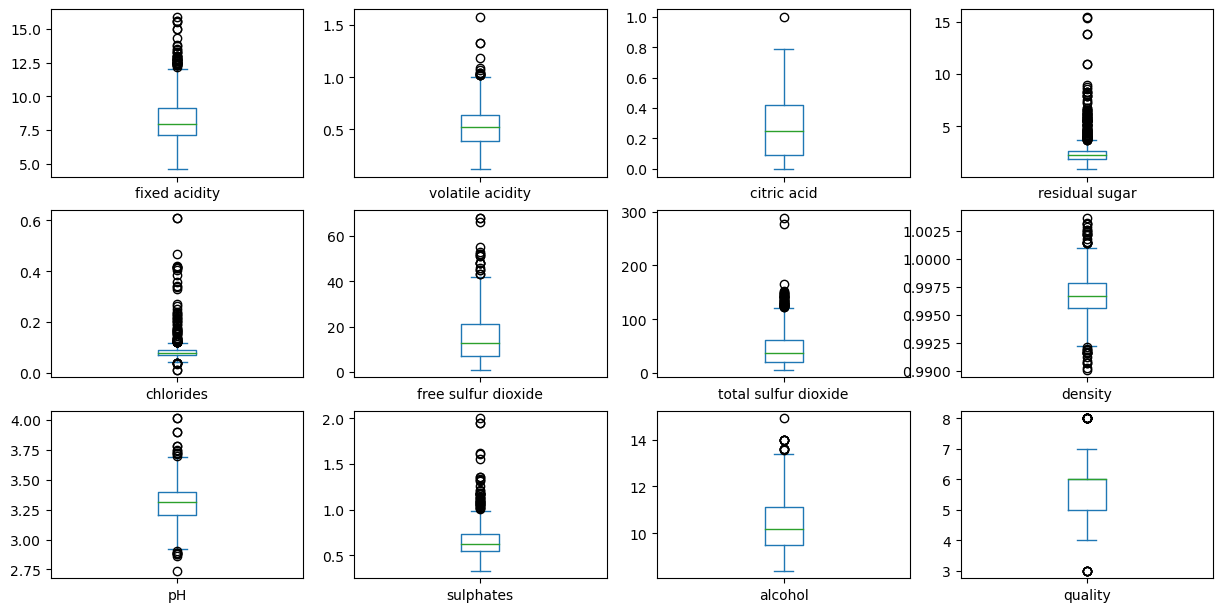

In [10]:
# Box Plots
wine_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

From both the box plots and histograms, we observe that serveral feauters, including fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates, are concentrated toward lower values. 
The histograms confirm that the majority of samples have low values for these features, with long right tails showing a few instances of higher values, which correspond to the outliers observed in the box plots.

- Fixed acidity and volatile acidity: The histograms show a right-skewed distribution, with most values clustered toward lower acidity, confirming the box plot’s identification of outliers at higher levels.

- Residual sugar and chlorides: Both features are heavily right-skewed, with most wines containing low sugar and chloride content, but a small number of samples have significantly higher values, as seen in both plots.

- Free sulfur dioxide and total sulfur dioxide: The data for these features is skewed toward lower values, with a few high outliers. The histograms clearly show the long tails corresponding to these higher concentrations.

 - Sulphates: Like the other features, sulphates are concentrated toward lower values with some higher outliers, which is evident in both visualizations.



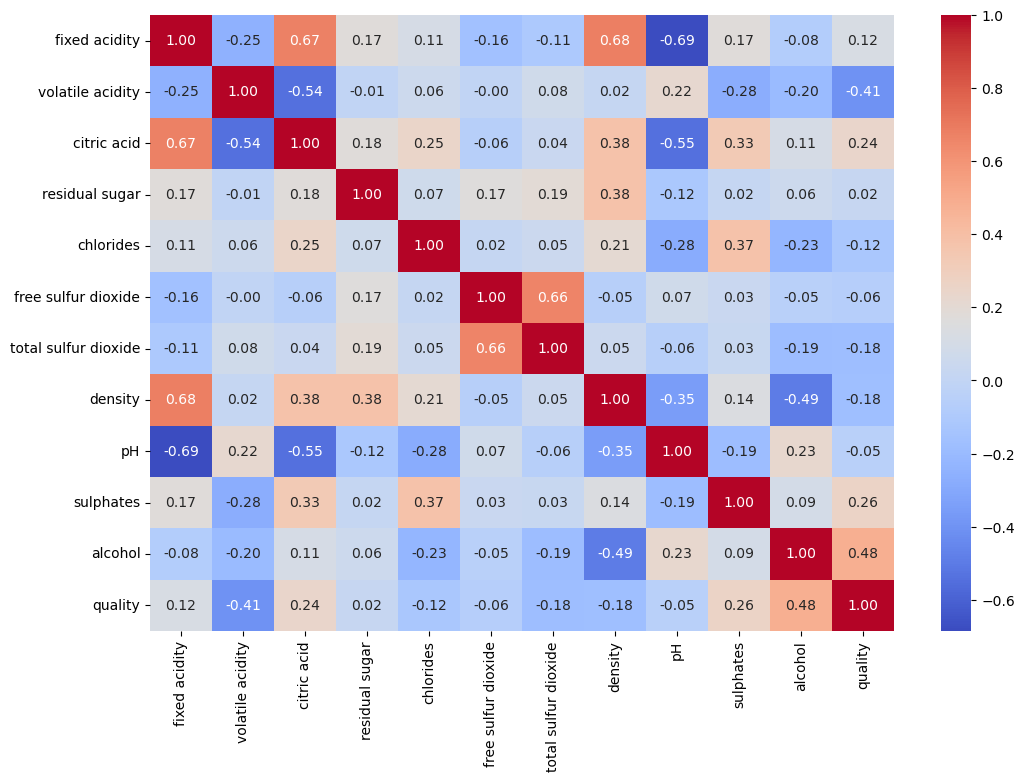

In [11]:
# Correlation Analysis
corr_matrix = wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In the correlation matrix, we focus on how the features relate to the target variable: `quality` 
- `alcohol` has the strongest postive correlation with `quality`:0.48, suggesting that higher alcohol content is associated with better wine quality.
- `volatile acidity` shows a negative correlation with `quality`:-0.4, suggesting that as volatile acidity increase, wine qualitry tends to decrease.
- other features like `citric acid`:0.24 and `sulphates`:0.26 also show positive correlations with quality, though not as stronglty as alcohol

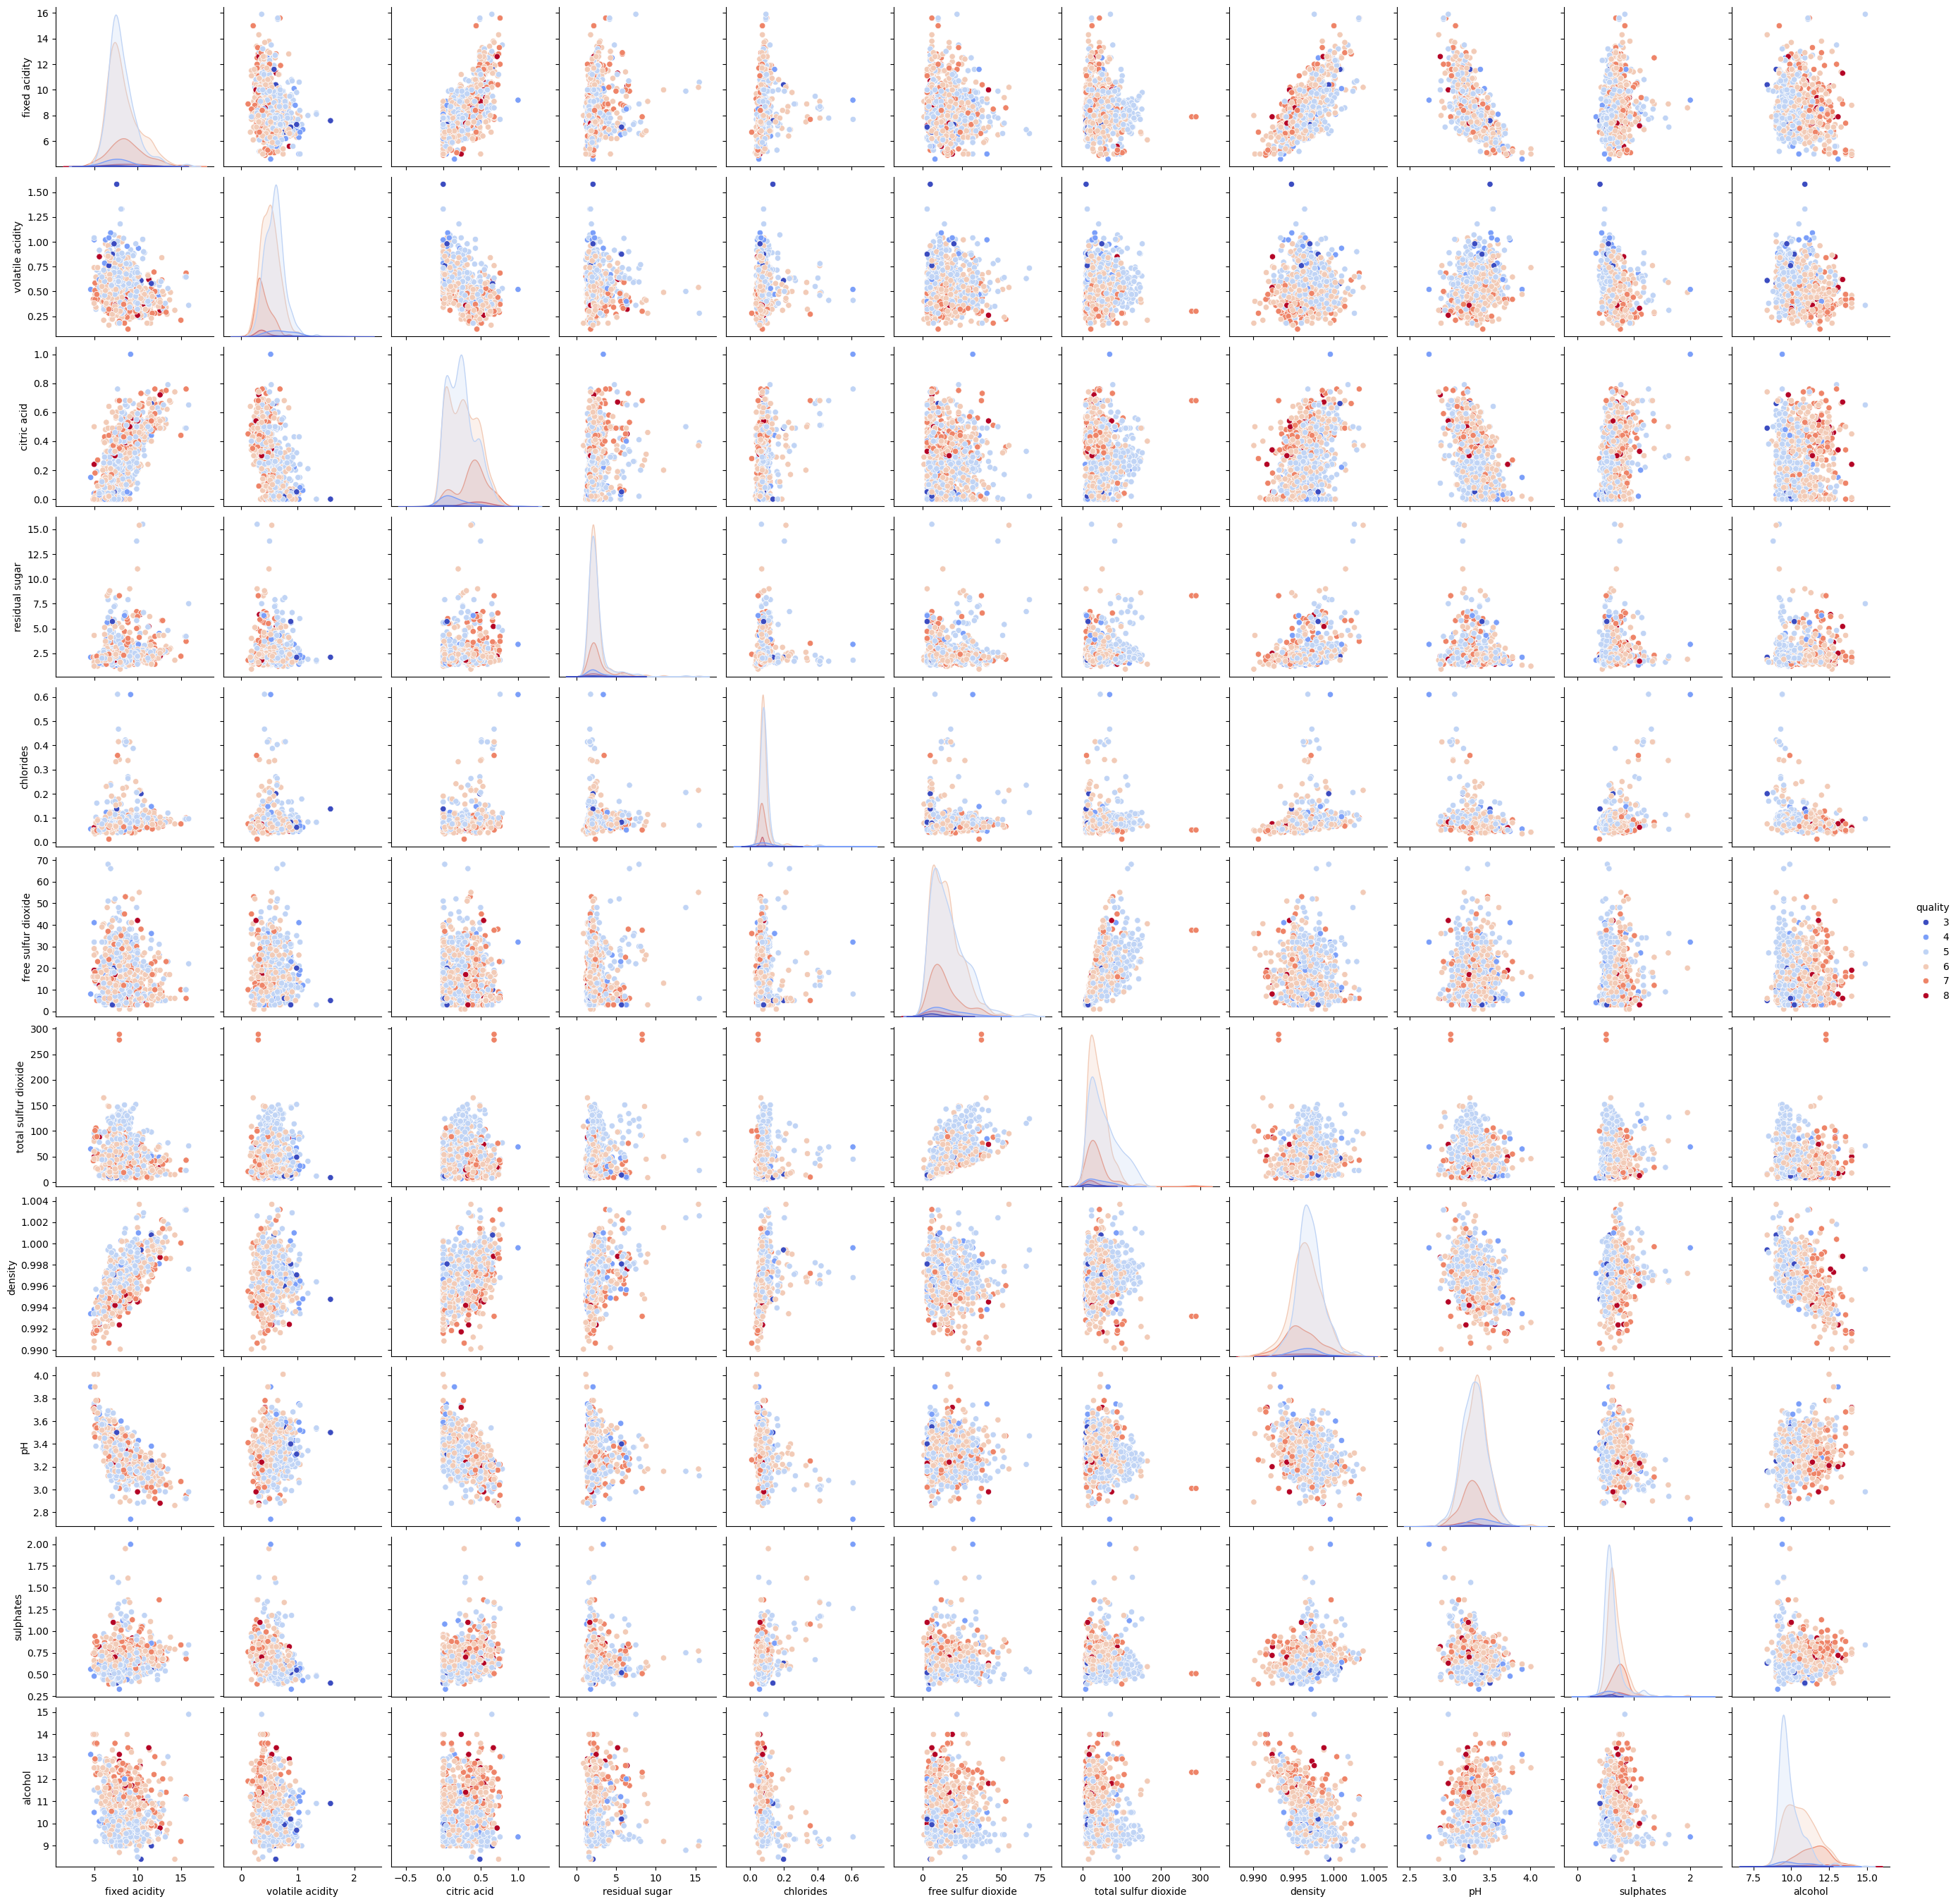

In [12]:
# Pair Plots
pairplot = sns.pairplot(wine_data, diag_kind="kde", hue="quality", palette="coolwarm")
pairplot.savefig("pairplot_wine_data.png")

plt.show()

The diagonal plots represent the feature distributions. For example, Alcohol shows a somewhat normal distribution with a peak between 9% and 11%, while Residual sugar and Chlorides display right-skewed distributions, indicating that most wines have low values for these features, with a few having significantly higher levels.

In the off-diagonal plots, we focus on identifying patterns that can inform model selection. These patterns, such as the clear relationships between alcohol content, volatile acidity, and quality, provide useful insights for setting up models like Random Forest and SVM. Based on the off-diagonal plots, it would be advisable to apply SVM with a radial basis function (RBF) kernel, experimenting with different values for C and gamma to optimize performance.

### Splite the Data

In [14]:
# Splite the data
from sklearn.model_selection import train_test_split

# assign X, y data
X = wine_data.drop(columns=['quality']) 
y = wine_data['quality'] 
# rematch label y
y = y - 3

# 8:2 traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print("Unique labels after remapping:", np.unique(y)) 

Unique labels after remapping: [0 1 2 3 4 5]


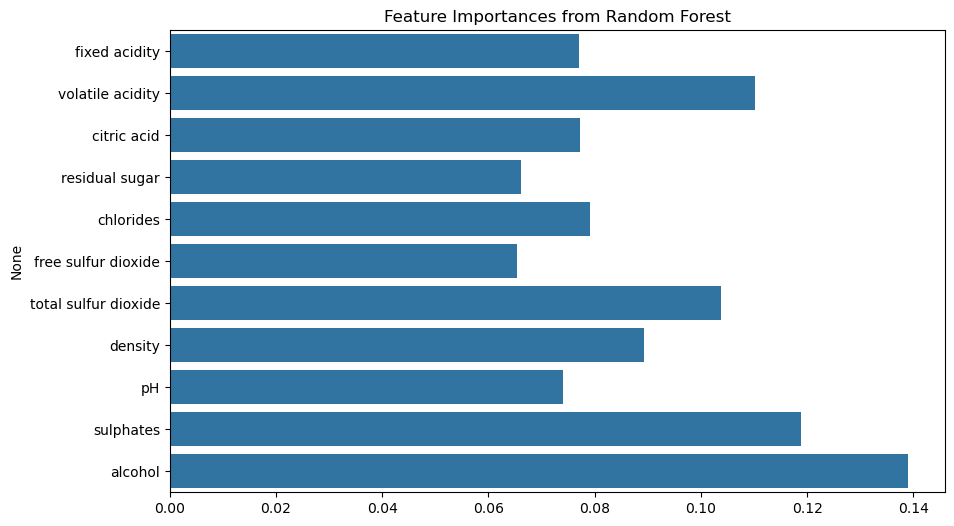

In [15]:
# the Feature checking for Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importances from Random Forest')
plt.show()

- Alcohol is the most important feature, followed by volatile acidity and total sulfur dioxide.
- Other features like sulphates, density, and citric acid also contribute but to a lesser degree.
- Features like chlorides and free sulfur dioxide have relatively lower importance.

### Standardization for SVM

In [16]:
# Scaling for SVM, but for the consistency, the data will apply to Random forest too
from sklearn.preprocessing import StandardScaler


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# convert to Panda dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [18]:
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (914, 11) (914,)
Testing set shape (X_test, y_test): (229, 11) (229,)


##### Data Checking after cleaning

In [19]:
X_train_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.142680,-1.402731,1.509693,-0.551024,0.116516,1.885598,1.791223,0.113558,-0.093148,0.568212,0.056613
1,0.968431,-1.179203,1.509693,-0.397768,-0.284239,-1.241882,-1.185720,-0.701767,-1.074740,0.447770,0.894456
2,0.378609,-1.235085,0.483394,0.061998,-0.642809,-0.557745,-0.214297,-0.555427,0.561248,0.206886,1.266830
3,-0.977982,1.950176,-1.158685,-0.244513,-0.431885,-0.362278,-0.809685,-0.168670,1.411962,-0.575987,-0.501948
4,-0.388160,-0.620386,-0.081071,1.058159,0.369624,1.201462,1.383852,0.604843,-1.074740,-0.515766,-1.246697


 # Building Model: SVM

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [30]:
def nonlinear_plot(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.show()
    
# C and gamma tuning
C_values = [0.1, 1, 10, 100,200]
gamma_values = [0.01, 0.1, 0.5, 1, 1.5, 2]

best_score = 0
best_params = {'C': None, 'gamma': None}

C=0.1, gamma=0.01, cross-val mean-accuracy: 0.554
C=0.1, gamma=0.1, cross-val mean-accuracy: 0.585
C=0.1, gamma=0.5, cross-val mean-accuracy: 0.439
C=0.1, gamma=1, cross-val mean-accuracy: 0.423
C=0.1, gamma=1.5, cross-val mean-accuracy: 0.423
C=0.1, gamma=2, cross-val mean-accuracy: 0.423
C=1, gamma=0.01, cross-val mean-accuracy: 0.579
C=1, gamma=0.1, cross-val mean-accuracy: 0.616
C=1, gamma=0.5, cross-val mean-accuracy: 0.599
C=1, gamma=1, cross-val mean-accuracy: 0.610
C=1, gamma=1.5, cross-val mean-accuracy: 0.586
C=1, gamma=2, cross-val mean-accuracy: 0.555
C=10, gamma=0.01, cross-val mean-accuracy: 0.586
C=10, gamma=0.1, cross-val mean-accuracy: 0.596
C=10, gamma=0.5, cross-val mean-accuracy: 0.593
C=10, gamma=1, cross-val mean-accuracy: 0.587
C=10, gamma=1.5, cross-val mean-accuracy: 0.585
C=10, gamma=2, cross-val mean-accuracy: 0.552
C=100, gamma=0.01, cross-val mean-accuracy: 0.592
C=100, gamma=0.1, cross-val mean-accuracy: 0.552
C=100, gamma=0.5, cross-val mean-accuracy: 0.5

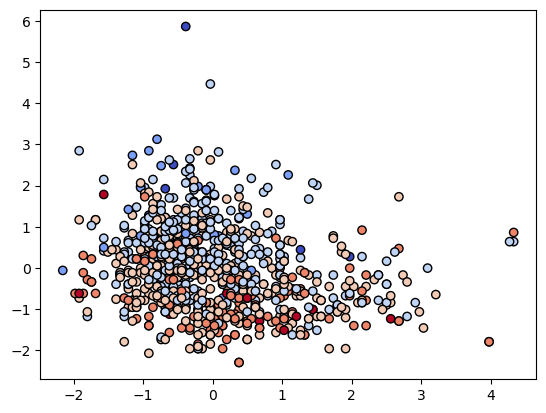

In [31]:
for C in C_values:
    for gamma in gamma_values:
        nlsvm = SVC(kernel='rbf', C=C, gamma=gamma)
        
        scores = cross_val_score(nlsvm, X_train_scaled, y_train, cv=5, scoring='accuracy')
        mean_score = np.mean(scores)
        print(f"C={C}, gamma={gamma}, cross-val mean-accuracy: {mean_score:.3f}")
        
        if mean_score > best_score:
            best_score = mean_score
            best_params['C'] = C
            best_params['gamma'] = gamma

print(f"Best cross-validation accuracy: {best_score:.3f}")
print(f"Best parameters: C={best_params['C']}, gamma={best_params['gamma']}")

nlsvm = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
nlsvm.fit(X_train_scaled, y_train)


nonlinear_plot(X_train_scaled, y_train, nlsvm)

Test set accuracy: 0.642


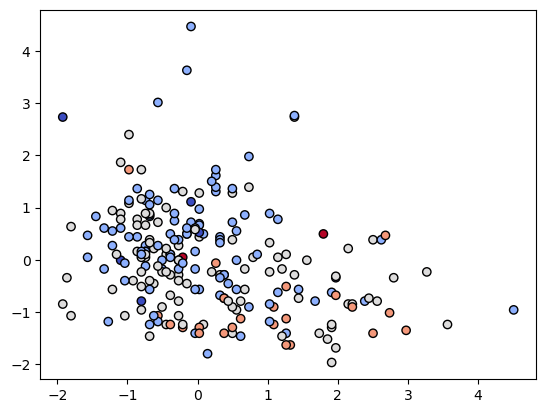

In [32]:
# testing dataset
test_accuracy = nlsvm.score(X_test_scaled, y_test)
print(f"Test set accuracy: {test_accuracy:.3f}")

nonlinear_plot(X_test_scaled, y_test, nlsvm)

In [33]:
from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")

In [34]:
param_grid = {
    'C': [2**i for i in range(-5, 6)],      
    'gamma': [2**i for i in range(-5, 6)]   
}
nlsvm = SVC(kernel='rbf')

grid = GridSearchCV(nlsvm, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print(f"Best parameters found: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_:.3f}")

Best parameters found: {'C': 2, 'gamma': 0.125}
Best cross-validation accuracy: 0.613


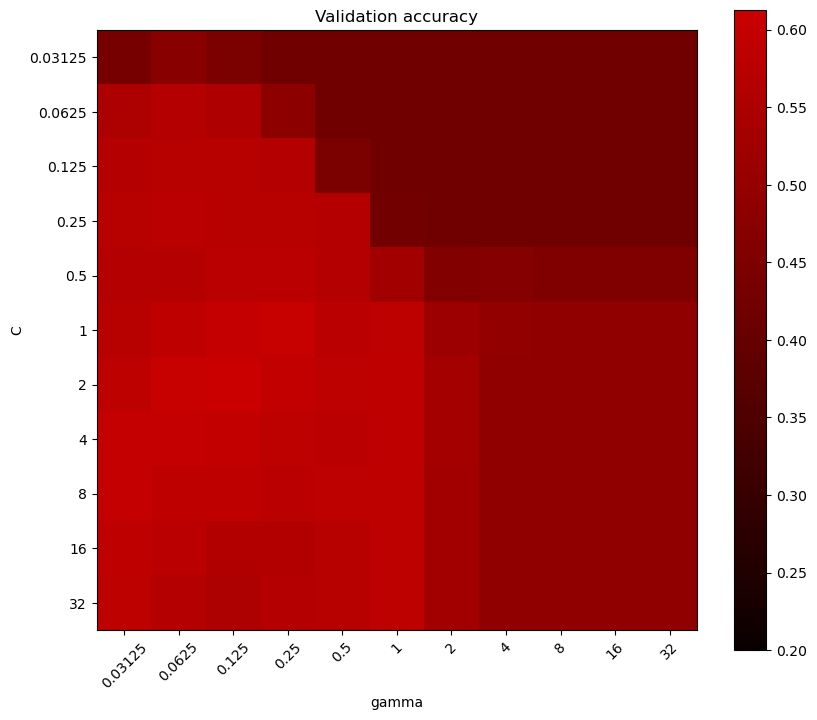

In [35]:
plotSearchGrid(grid)
nlsvm = grid.best_estimator_


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [48]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
important_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                      'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
X_important = X[important_features]
X_important.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,1.9,34.0,0.9978,0.56,9.4
1,7.8,0.88,0.00,2.6,67.0,0.9968,0.68,9.8
2,7.8,0.76,0.04,2.3,54.0,0.9970,0.65,9.8
3,11.2,0.28,0.56,1.9,60.0,0.9980,0.58,9.8
4,7.4,0.70,0.00,1.9,34.0,0.9978,0.56,9.4


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
rf = RandomForestClassifier(random_state=42)


In [51]:
scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Baseline Random Forest cross-val mean-accuracy: {np.mean(scores):.3f}")


Baseline Random Forest cross-val mean-accuracy: 0.641


In [52]:
param_grid = {
    'n_estimators': [100, 200, 500],      
    'max_depth': [10, 20,30, None],          
    'min_samples_split': [2, 5,6, 7,8,9, 10],      
    'min_samples_leaf': [1, 2, 4,8],        
    'bootstrap': [True, False]            
}

In [53]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [54]:
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

Best parameters found by GridSearchCV: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [55]:
best_rf = RandomForestClassifier(
    
    warm_start=True, 
    random_state=42, 
    **best_params  
)

In [56]:
train_errors = []
test_errors = []

best_accuracy = 0
best_n_estimators = 0

n_estimators_range = range(1, 201)  

for n_estimators in n_estimators_range:
    best_rf.set_params(n_estimators=n_estimators)
    best_rf.fit(X_train_scaled, y_train)
    
    # Predict on both training and test sets
    y_train_pred = best_rf.predict(X_train_scaled)
    y_test_pred = best_rf.predict(X_test_scaled)
    
    # Calculate misclassification error (1 - accuracy)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append errors for plotting later
    train_errors.append(train_error)
    test_errors.append(1 - test_accuracy)
    
    # Track the best accuracy and corresponding number of trees (n_estimators)
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_n_estimators = n_estimators

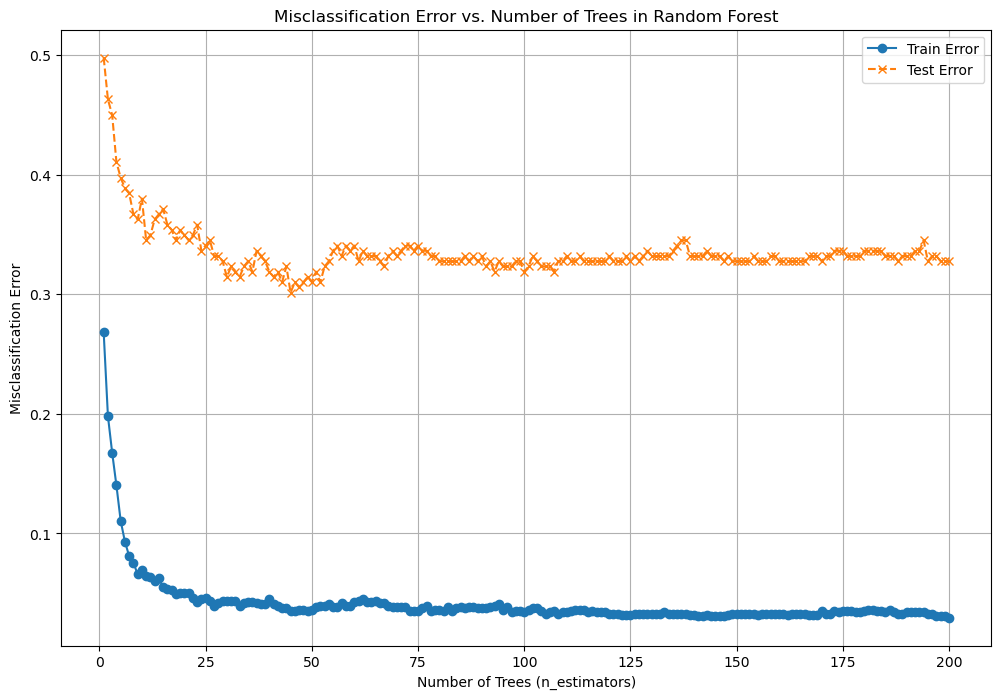

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(n_estimators_range, train_errors, label="Train Error", linestyle='-', marker='o')
plt.plot(n_estimators_range, test_errors, label="Test Error", linestyle='--', marker='x')
plt.title("Misclassification Error vs. Number of Trees in Random Forest")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Misclassification Error")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
print(f"Best accuracy on the test set: {best_accuracy:.3f}")
print(f"Best number of trees (n_estimators): {best_n_estimators}")

Best accuracy on the test set: 0.699
Best number of trees (n_estimators): 45


In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

## Neural Network
### Additional model to test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

mlp = MLPClassifier(hidden_layer_sizes=(300, 500, 500, 500, 300),  
                    activation='relu',              
                    solver='adam',    
                    batch_size=32,
                    alpha=0.001,
                    max_iter=300,                    
                    random_state=42)

mlp.fit(X_train_scaled, y_train)
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")

Training accuracy: 0.969
Test accuracy: 0.607


# Results and Analysis


### Random Forest:

- Best test accuracy: 0.699 with 45 trees.
This shows that Random Forest is the best performer on your dataset, balancing generalization (test set performance) and complexity (the number of trees).

### SVM:

- Best cross-validation accuracy: 0.613 with the parameters C=2 and gamma=0.125.
While SVM performed decently, it falls short compared to Random Forest's test accuracy.
### Neural Network:

- Training accuracy: 0.969, but test accuracy: 0.607.
The large gap between training and test accuracy indicates significant overfitting. 

the reason of why random forest is the best classifer. 
- Generalization: Random Forest had the highest accuracy on the test data, meaning it was better at predicting new data compared to the other models.
- Stability: Random Forest combines several decision trees, which helps prevent overfitting (learning the training data too well and performing poorly on new data).

# Discussion and Conclusion

In this project, we tested three models—Random Forest, SVM, and a Neural Network—to predict wine quality. Random Forest turned out to be the best, achieving the highest accuracy on new, unseen data.

1. Random Forest performed the best with a test accuracy of 69.9%. This model worked well because it combines several decision trees, which helps it handle more complex patterns in the data and avoids overfitting.

2. SVM had an accuracy of 61.3%, but it didn’t do as well as Random Forest. SVM works well when data has clear boundaries, but it seems that the wine data was more complicated, and Random Forest handled that better.

3. Neural Network had a high training accuracy of 96.9%, but its test accuracy was only 60.7%, showing overfitting. The model learned the training data too well and struggled to generalize to new data.

The reasons other models didn't went well:
- the Neural Network overfitted because it didn’t have enough regularization, and the dataset may not be large enough for deep learning to work well.
- SVM didn’t capture the complex patterns in the dataset as well as Random Forest did.

Ways to improve:
- More Data, and more data
- Improveing the Neural Network by adding teahniques like dropout or early stopping could help reduce the overfitting in the neural network and improve the performamce. 
